In [2]:
# El codigo consta de 3 partes:
# 1. Codificacion de la entrada
# 2. Ejecucion del algoritmo (hacer operaciones sobre los qubits)
# 3. Extraccion del resultado

# Los dos bits que deseamos sumar estaran codificados en las posiciones 0 y 1 de nuestro
# circuito cuantico. Como deseamos sumar 1 + 1, entonces debemos aplicar la compuerta
# Hadamard tanto al qubit 0 como al qubit 1. Luego, realizar operaciones sobre los qubits
# para extraer posteriormente el resultado de la medida codificados en los qubits 2 y 3.

# La compuerta CNOT tiene la siguiente tabla de verdad
#                | Qubit_1 | Qubit_0 | Salida |
#                |    0    |    0    |   00   |
#                |    0    |    1    |   11   |
#                |    1    |    0    |   10   |
#                |    1    |    1    |   01   |

# Cuando los qubits son iguales, tenemos un 0 a la izquierda.
# Cuando los qubits son diferentes, tenemos un 1 a la izquierda.

# No queremos reescribir en el ultimo qubit, entonces escribimos el resultado en otros 
# dos bits clasicos, y asi debemos usar dos compuertas CNOT

In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

/var/folders/xv/flnbdkyj7z301sst5cmzz3kr0000gn/T/ipykernel_69088/1848466411.py:13: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc1 + qc2+ qc3


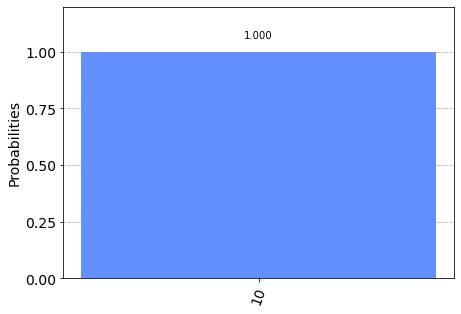

In [30]:
qc1 = QuantumCircuit(2)
qc1.x(0)
qc1.x(1)

qc2 = QuantumCircuit(2)
qc2.barrier(range(2))
qc2.x(0)
qc2.cx(0,1)

qc3 = QuantumCircuit(2)
qc3.measure_all()

qc = qc1 + qc2+ qc3
#qc.draw('mpl')

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)


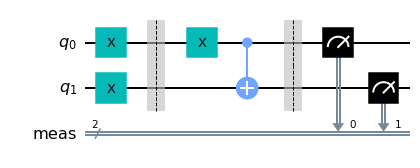

In [31]:
qc.draw('mpl')

In [32]:
# Cuando los qubits son iguales, tenemos un 0 a la izquierda.
# Cuando los qubits son diferentes, tenemos un 1 a la izquierda.

# No queremos reescribir en el ultimo qubit, entonces escribimos el resultado en otros 
# dos bits clasicos, y asi debemos usar dos compuertas CNOT

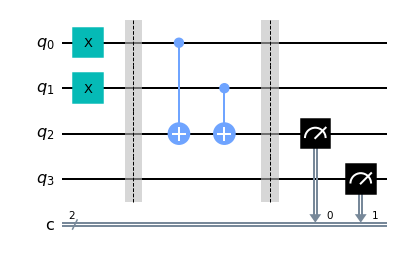

In [42]:
qc_ha = QuantumCircuit(4,2)
# codificamos la entrada en qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw("mpl")

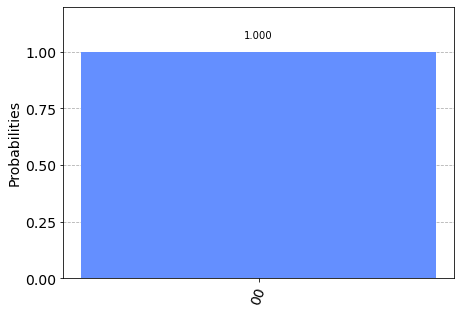

In [43]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)